<a href="https://colab.research.google.com/github/santolina/Convolutional-Neural-Networks-in-TensorFlow/blob/master/Exercise_8_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [3]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [31]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    #with open(filename) as training_file:
    # Your code starts here
    data = np.loadtxt(filename, skiprows=1, dtype='float', delimiter=',')
      
    labels  = data[:,0]
    images = data[:,1:785].reshape([data.shape[0],28,28])

      # Your code ends here
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [33]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = training_images.reshape([training_images.shape[0], training_images.shape[1], training_images.shape[2], 1])
testing_images = testing_images.reshape([testing_images.shape[0], testing_images.shape[1], testing_images.shape[2], 1])

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1/255., 
    horizontal_flip = True, 
    rotation_range = 0.4, 
    width_shift_range = 0.2,
    height_shift_range = 0.2
    )

validation_datagen = ImageDataGenerator(
    rescale = 1/255., 
    horizontal_flip = True, 
    rotation_range = 0.4, 
    width_shift_range = 0.2,
    height_shift_range = 0.2
    )
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [54]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
    tf.keras.layers.Conv2D(filters = 64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='sigmoid')]
    )

# Compile Model. 
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

#model.summary()

# Train the Model
history = model.fit_generator(train_datagen.flow(x=training_images, y=training_labels, batch_size=32), epochs=25, validation_data = validation_datagen.flow(x=testing_images, y=testing_labels, batch_size=32))

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Epoch 1/25
858/858 [==============================] - 56s 66ms/step - loss: 2.2440 - acc: 0.3009 - val_loss: 1.5470 - val_acc: 0.4714
Epoch 2/25
858/858 [==============================] - 56s 65ms/step - loss: 0.9927 - acc: 0.6696 - val_loss: 0.8854 - val_acc: 0.6988
Epoch 3/25
858/858 [==============================] - 55s 65ms/step - loss: 0.6134 - acc: 0.7968 - val_loss: 0.7304 - val_acc: 0.7511
Epoch 4/25
858/858 [==============================] - 55s 64ms/step - loss: 0.4314 - acc: 0.8592 - val_loss: 0.4455 - val_acc: 0.8504
Epoch 5/25
858/858 [==============================] - 55s 65ms/step - loss: 0.3129 - acc: 0.8995 - val_loss: 0.3585 - val_acc: 0.8805
Epoch 6/25
858/858 [==============================] - 56s 65ms/step - loss: 0.2381 - acc: 0.9237 - val_loss: 0.3096 - val_acc: 0.8961
Epoch 7/25
858/858 [==============================] - 55s 65ms/step - loss: 0.1984 - acc: 0.9382 - val_loss: 0.2402 - val_acc: 0.9215
Epoch 8/25
858/858 [==============================] - 55s 64ms

[6.92426086682151, 0.56609035]

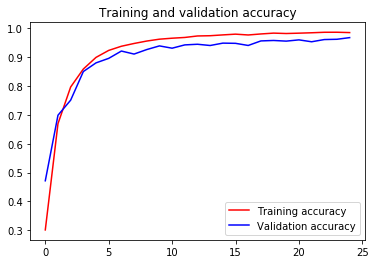

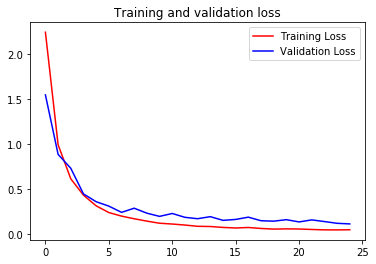

In [58]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['acc'] # Your Code Here
val_acc = history.history['val_acc'] # Your Code Here
loss = history.history['loss'] # Your Code Here
val_loss = history.history['val_loss'] # Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [60]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               819712    
_________________________________________________________________
dense_36 (Dense)             (None, 26)              

In [59]:
successive_outputs = [layer.output for layer in model.layers[1:]]
#successive_outputs = [layer.output for layer in model.layers[:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
x = testing_images[0]
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 
    #plt.imshow( display_grid, aspect='auto', cmap='gray' )

ValueError: ignored